# Introduction

The text from the 2016 US Presidential Debate was analysed in order to begin to gain insight into how the candidates positoned themselves in thr market for votes. 

There was widepsread accusation of media bias so how much opportunity Clinton and Trump had each been given to speak was first analysed along with the number of words spoken by each and the comprehension difficulty of those words.

A word cloud was created in order to gain insight into key topics that each candidate tried to repeat. The 2016 election was unique in the dissemination of labels that Trump used with particularly good effect such as 'Low Energy Jeb' for Jeb Bush, 'Crooked Hillary' for Hillary Clinton or 'Pocahontas' for Elizabeth Warren. Word frequency might help gain insight into the themes that both candidates wished to anchor in the minds of the electorate.

In [32]:
import pandas as pd
df = pd.read_csv('data/debate.csv', encoding = "ISO-8859-1")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [33]:
#who had the most turns to speak?
turns = {'Clinton': 0,
        'Trump': 0}
for index, row in df.iterrows():
    if row[1] == 'Clinton':
        turns['Clinton']+=1
    elif row[1] == 'Trump':
        turns['Trump']+=1
        
turns
        

{'Clinton': 243, 'Trump': 355}

<IPython.core.display.Javascript object>


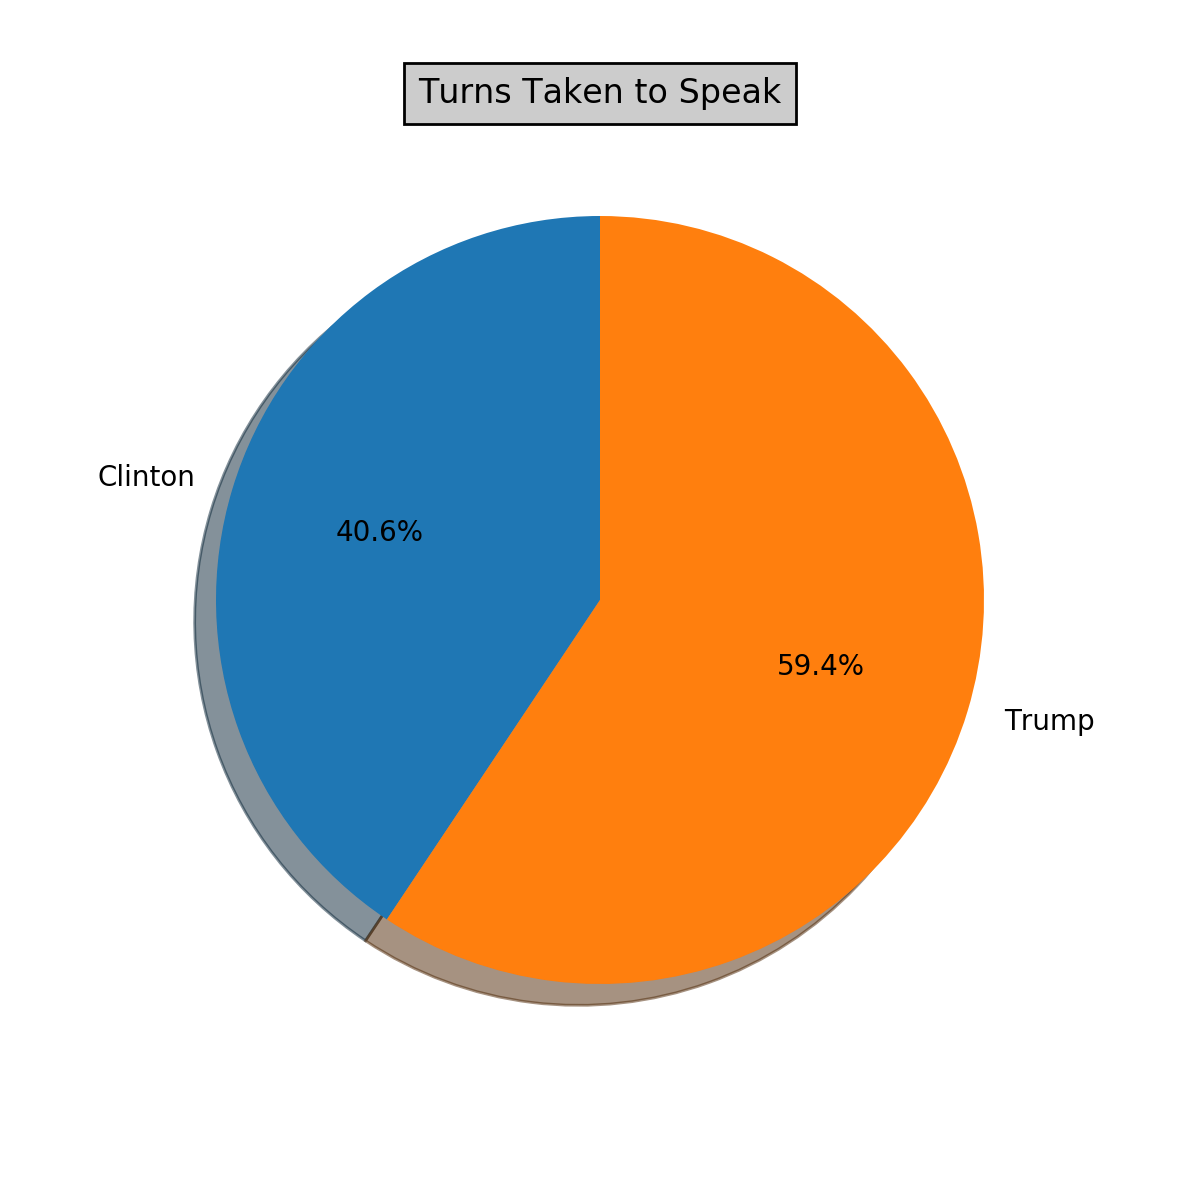

In [34]:
from pylab import *

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = 'Clinton', 'Trump'
fracs = [turns['Clinton'], turns['Trump']]

pie(fracs, labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=90)
                # The default startangle is 0, which would start
                # the Frogs slice on the x-axis.  With startangle=90,
                # everything is rotated counter-clockwise by 90 degrees,
                # so the plotting starts on the positive y-axis.

title('Turns Taken to Speak', bbox={'facecolor':'0.8', 'pad':5})

show()

In figure 1 above we can see that Trump took 60% of the total available opportunities to speak.

<IPython.core.display.Javascript object>


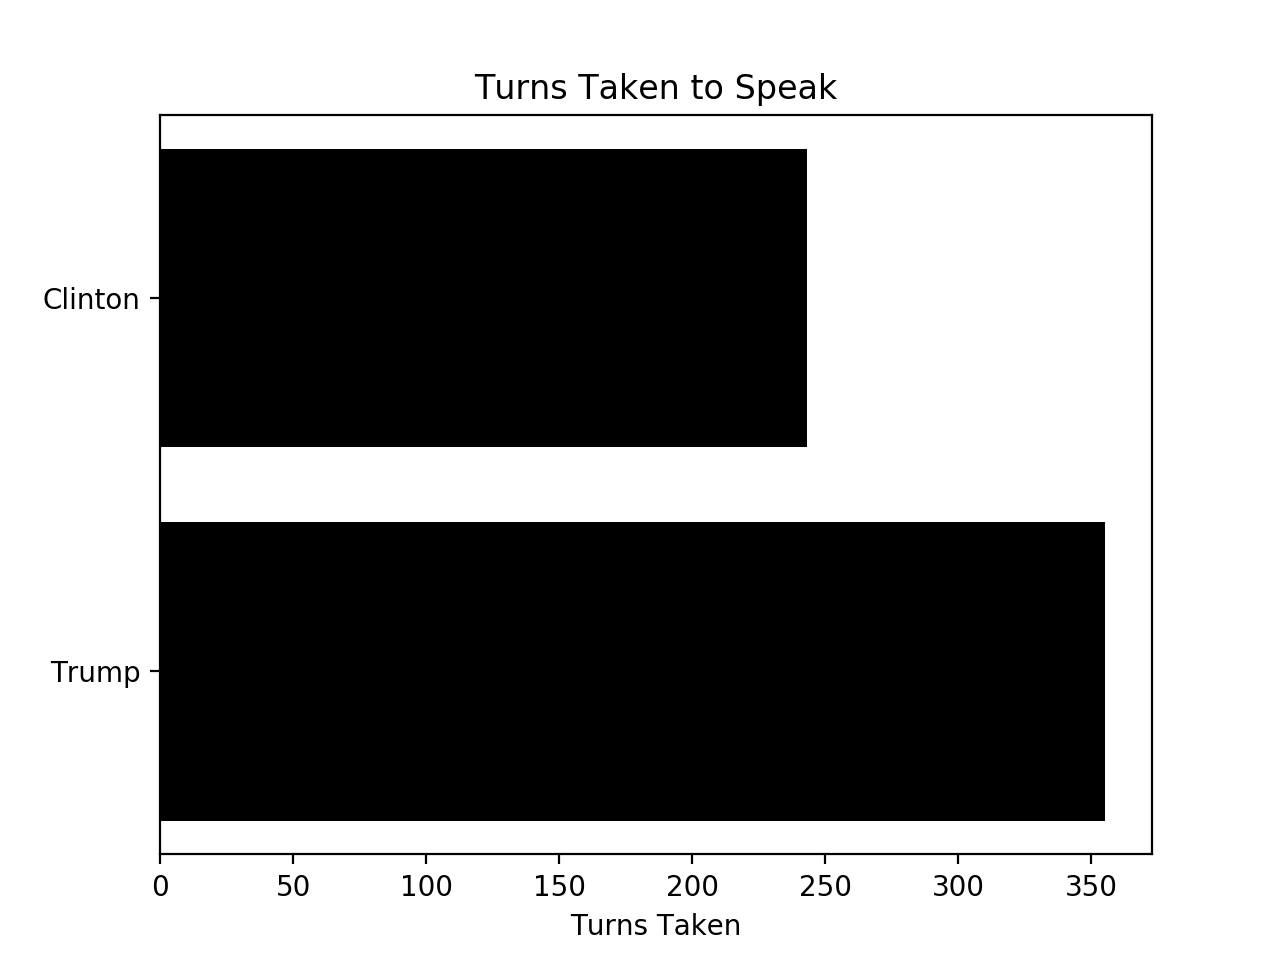

In [35]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Clinton', 'Trump')
y_pos = np.arange(2)
number_turns = array([turns['Clinton'], turns['Trump']])

ax.barh(y_pos, number_turns, align='center',
        color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Turns Taken')
ax.set_title('Turns Taken to Speak')

plt.show()


Figure 1 is augmented above in Figure 2 with a histogram

In [36]:
#who used the most words?
words = {'Clinton': 0,
        'Trump': 0}
for index, row in df.iterrows():
    if row[1] == 'Clinton':
        words['Clinton']+= len(row[2].split())
    elif row[1] == 'Trump':
        words['Trump']+= len(row[2].split())

<IPython.core.display.Javascript object>


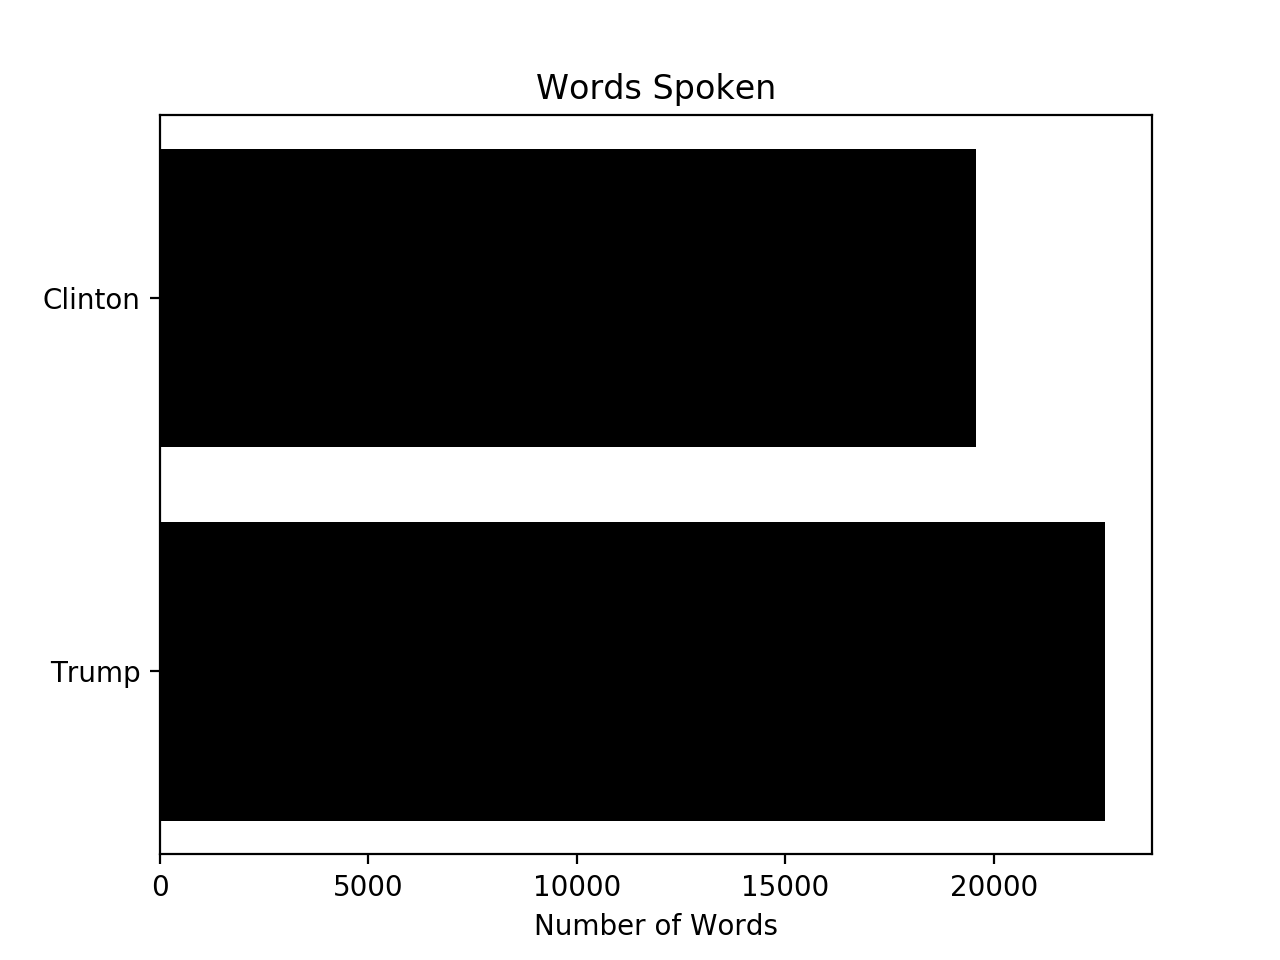

In [37]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


plt.rcdefaults()
fig, ax = plt.subplots()

number_words = array([words['Clinton'], words['Trump']])

ax.barh(y_pos, number_words, align='center',
        color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Words')
ax.set_title('Words Spoken')

plt.show()

As well as taking more turns to speak Trump also delivered more words in total. So the turns taken cannot wholly be put down to interjection or rudeness.

In [38]:
# how easy was each candidate to understand

clinton_whole_text = ''
trump_whole_text = ''

for index, row in df.iterrows():
    if row[1] == 'Clinton':
        clinton_whole_text += row[2] + ' '
    elif row[1] == 'Trump':
        trump_whole_text += row[2] + ' '
        
import string
exclude = set(string.punctuation)
clinton_whole_text_excluded = ''.join(ch for ch in clinton_whole_text if ch not in exclude)
trump_whole_text_excluded = ''.join(ch for ch in trump_whole_text if ch not in exclude)

from stop_words import get_stop_words

stop_words = get_stop_words('english')
stop_words_string = " ".join(str(x) for x in stop_words)
stop_words = ''.join(ch for ch in stop_words_string if ch not in exclude)


clinton_whole_text_excluded = [i for i in clinton_whole_text_excluded.lower().split() if i not in stop_words]
trump_whole_text_excluded = [i for i in trump_whole_text_excluded.lower().split() if i not in stop_words]




<IPython.core.display.Javascript object>


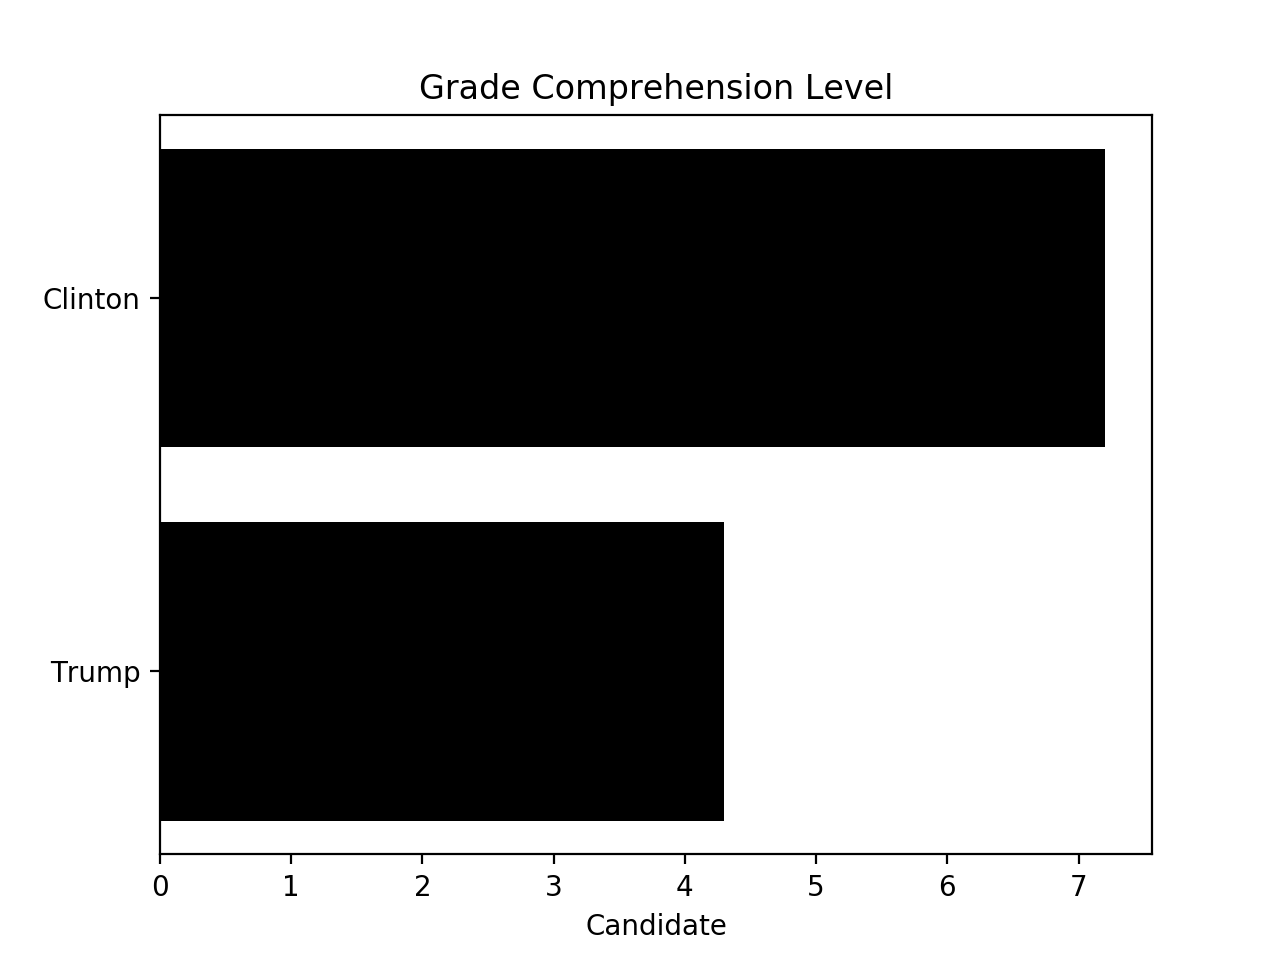

In [39]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


plt.rcdefaults()
fig, ax = plt.subplots()

from textstat.textstat import textstat

grade_comp={}
grade_comp['Clinton']=textstat.flesch_kincaid_grade(clinton_whole_text)
grade_comp['Trump']=textstat.flesch_kincaid_grade(trump_whole_text)

# Example data
people = ('Clinton', 'Trump')
y_pos = np.arange(2)
number_turns = array([grade_comp['Clinton'], grade_comp['Trump']])

ax.barh(y_pos, number_turns, align='center',
        color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Candidate')
ax.set_title('Grade Comprehension Level')

plt.show()

The grade comprehension level of Trump's speech was that of a Grade 4 students, whereas Hillary required a grade 7 comprehension level. So while Trump used more words and took more turns, Clinton demanded slightly more cognitive energy from the audience. Based on this analysis I don't think either side could reasonably claim an objective moral or intellectual high ground. Relatively, Trump appears to be trying to be more aggressive by physically dominating the debate and appealling less to intellect, and Hillary relatively vice versa.

In [40]:
word_frequency_clinton = {}
word_frequency_trump ={}
for word in clinton_whole_text:
        if word in word_frequency_clinton.keys():
            word_frequency_clinton[word] +=1
        else:
            word_frequency_clinton[word] = 1
for word in trump_whole_text:
        if word in word_frequency_trump.keys():
            word_frequency_trump[word] +=1
        else:
            word_frequency_trump[word] = 1

<IPython.core.display.Javascript object>


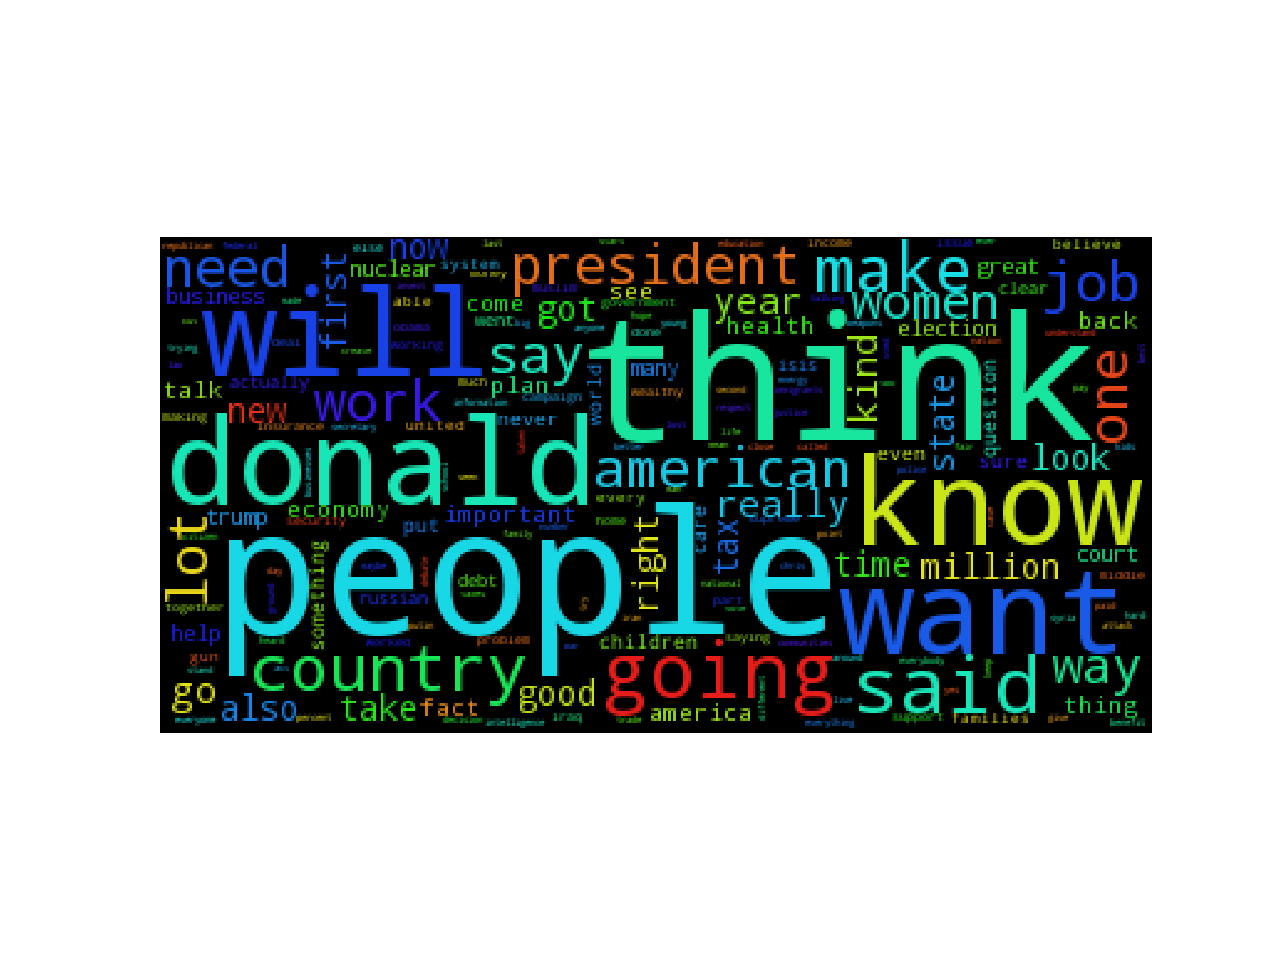

In [41]:
from wordcloud import WordCloud

clinton_whole_text_string_excluded = " "
clinton_whole_text_string_excluded = clinton_whole_text_string_excluded.join(clinton_whole_text_excluded)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
#plt.imshow(wordcloud)
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=70).generate(clinton_whole_text_string_excluded)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

From the wordcloud above we can see that Mrs Clinton's speech had a hopeful 'progressive' future-focussed tone with 'going', 'will', 'make' and 'want' featuring prominently. Mrs Clinton also implores her audience to 'think' and 'people' feature heavily which are a proxy for more complex terms like society and community. She also refers to Mr Trump heavily as 'Donald' which could be a way of anchoring cognitive association but that's just speculation at this stage.

<IPython.core.display.Javascript object>


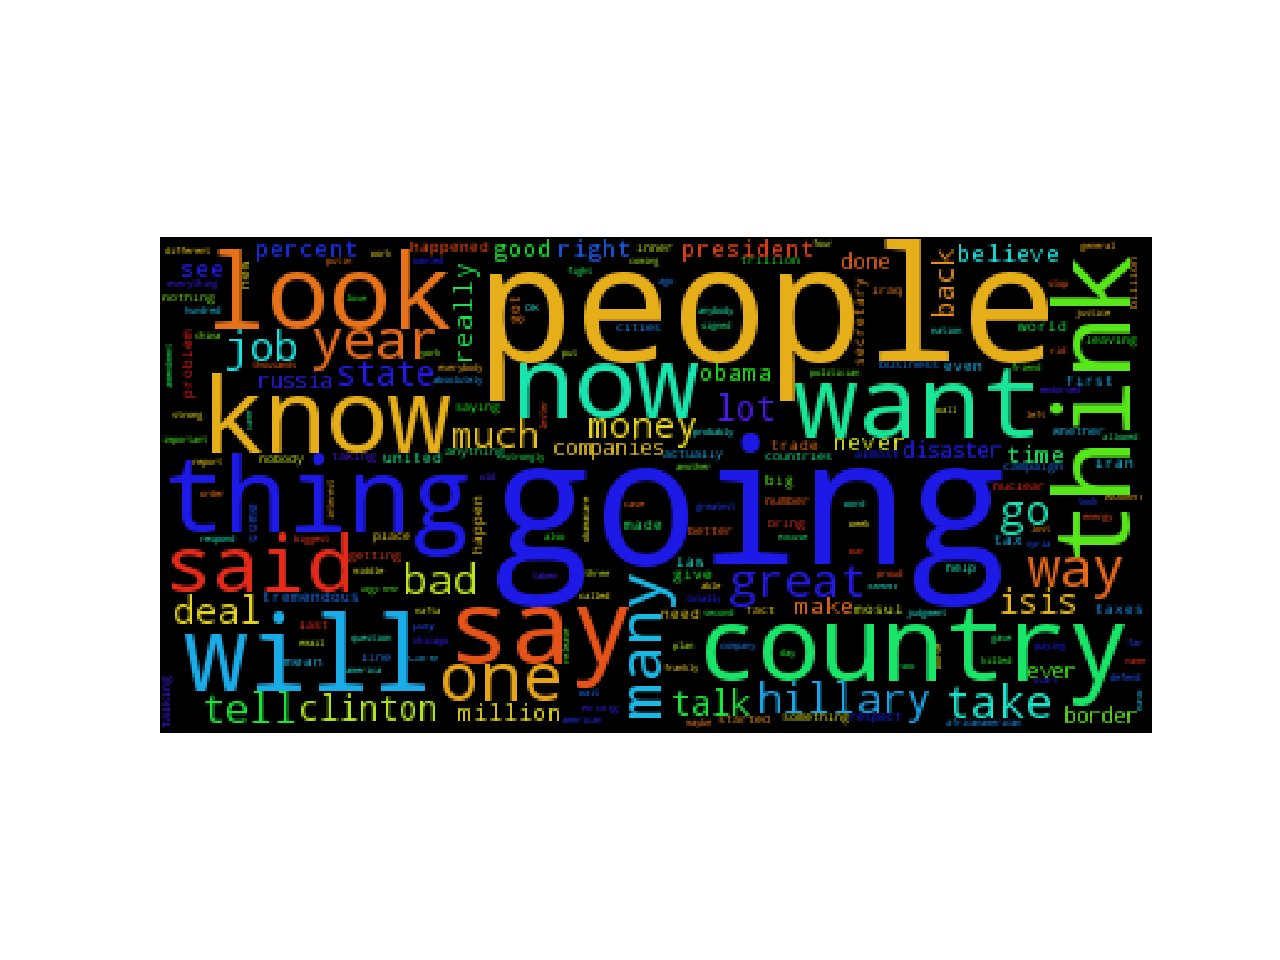

In [42]:
from wordcloud import WordCloud

trump_whole_text_string = " "
trump_whole_text_string = trump_whole_text_string.join(trump_whole_text_excluded)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=70).generate(trump_whole_text_string)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Mr Trump's two most repeated words are 'people' and 'going'. This invokes more of the tone of a Patriarchal Dictator tone than Clinton's thoughtful, more progressive tone. Ultimately the candidate's word clouds are more similar than they are different, with many of the same words appearing in each.

In conclusion, Rene Girard's Memetic theory of conflict states that all conflict stems from humans fighting over the same thing. Both candidates were given fairly equal weight given their interpersonal styles and the types of voter they were targetting. Both candidates word clouds are surprisingly similar given the vitriol and hatred of the campaign, which affirms the Girard hypothesis in that both candidates are fighting over similar cognitive territory in the mind of the voter. 

There is little objective evidence to discern them greatly, nor is there much evidence to demonstrate claims of media bias. There is, however, enough to meaningfully discern them relative to eachother and, bearing in mind the Girard theory of conflict, this may allow for deeper insight under further analysis


